In [36]:
import numpy as np
import pandas as pd
import string
import re

from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhkosara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# EXECUTIVE SUMMARY

Given a large number of documents in English (E.g., News articles in this project), the goal of the project is to be able to auto-categorize the documents into groups using unsupervised text clustering mechanisms.

# Problem statement

The idea is to implement a text similarity mechanism so that when given a large number of documents written in English, the algorithm should be able to group the documents into categories depending on the content of the documents.

This problem can be solved in a variety of ways based on the knowledge I acquired so far. A few examples are as below:
1.	Using some mini hashing algorithm along with similarity methods (Jaccard, Cosine, etc.)
2.	Using some numerical representation of words followed by feature extraction followed by  using unsupervised clustering algorithm, e.g., k-means to classify the documents into groups.

Within the limitations of this course, I believe that the problem can be solved using the first two methods listed above. I have chosen to implement the second method.

# ABOUT THE DATA

Source: http://qwone.com/~jason/20Newsgroups/

The data in the document repo are in the format of emails sent about some or other specific type of news clippings observed by the email author. I read a comment online saying that the dataset is apparently collected by the Stanford Natrual Language Processing Group over a period of several years.

There are three data sets available.
   - 20news-19997.tar.gz  - Original 20 Newsgroups data set   
   - 20news-bydate.tar.gz - Sorted by date; duplicates and some headers removed (18846 documents)   
   - 20news-18828.tar.gz  - Duplicates removed, only "From" and "Subject" headers (18828 documents)   

The website recommends to use the “20news-bydate” data since some sort of data cleaning is already done, e.g., removal of newsgroup-identifying information removal, etc. And also the data is separated into the train and test sets.


The 20 Newsgroups dataset is an aggregation of 18846 newsgroup documents, split evenly across different news groups.

The data is organized into 20 different news groups, wherein each group corresponds to a specific topic.

**Topic**  
  - alt.atheism  
  - comp.graphics  
  - comp.os.ms-windows.misc  
  - comp.sys.ibm.pc.hardware  
  - comp.sys.mac.hardware  
  - comp.windows.x  
  - misc.forsale  
  - rec.autos   
  - rec.motorcycles   
  - rec.sport.baseball   
  - rec.sport.hockey   
  - sci.crypt   
  - sci.electronics   
  - sci.med   
  - sci.space   
  - soc.religion.christian   
  - talk.politics.guns   
  - talk.politics.mideast   
  - talk.politics.misc   
  - talk.religion.misc

Based on the visual inspection of the names of the top-level folders,
the data appears to categorized as follows.  
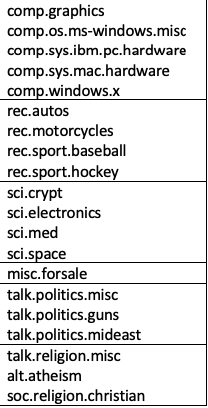

In plain English, I would like to state the category types asfollows in no particular order:  
  - "politics"  
  - "religion"  
  - "sports and cars"  
  - "computer hardware"  
  - "Misc: electronics, medicine, crpto,etc"  
  - "for sale"

**Each data file consists of subject enclosed with an email header and some footer information as below.**   
  
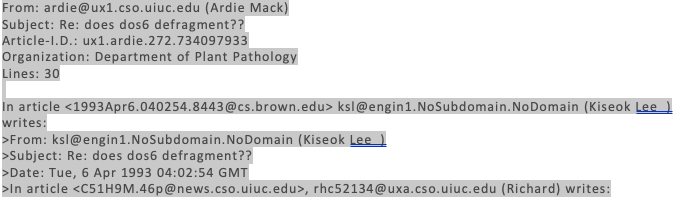  

# WORK FLOW EXPLANATION

# Workflow diagram

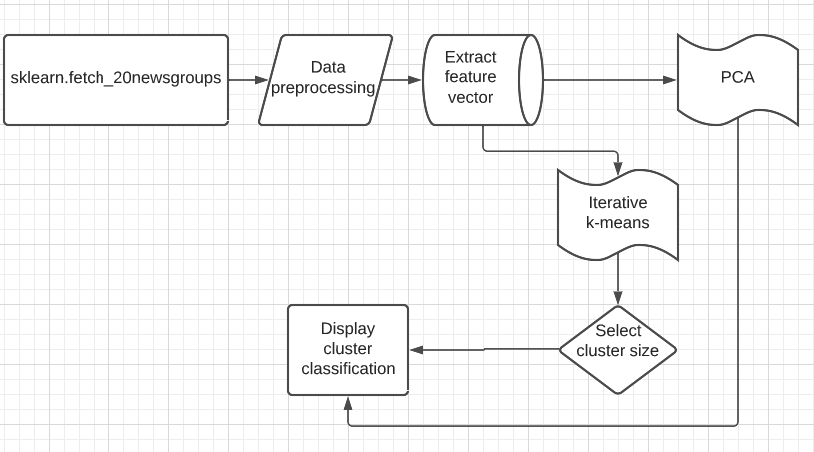

## Download the data

Download the data using the function **fetch_20newsgroups** provided by the **sklearn** package. This function allows the user to download the data with the email headers, footers, and quotes which I am going to use. 

This extra information, i.e., "headers, footers, etc" if not removed can have an effect of overlapping of data all over the place across multiple dimensions of the feature vector leading to poor classification.

## Data preprocessing

**Remove punctuation**  
This can lead to wrong classification depending on the data type that we are trying to classify. I chose to remove punctuation.

**Remove numbers**  
I chose to remove numerics as I felt that numbers do not play a role in classification of data.

**Lower case**  
Case sensitiviy do not have any role in document classification. So all of the data will be forced to lower case.

**Remove stop words**   
The stop words, e.g., conjunctions, etc. are not useful in most of the classification problems. I opine that since we are trying to classify the news articles, the stop words may not add much the accuracy. I will experiment with removal and non-removal of stop words to test the accuracy.
 
**Lemmatizatize words**  
The goal is to reduce the inflectional forms, and sometimes derivationally related forms of words to a common base word.
A few examples below:
  - “fishing”, “fished”, “fisher” will stem to “fish”.
  - “am”, “are”, will lemmatize to “be”.

## Extract feature vectors

Text documents are generally nothing but a bunch of words. In order to perform any statistical analysis using computers, the text files are to be converted into numerical format. 

My choice of encoding is to use TF-IDF (Term Frequencues Inverse Document Frequency) methodology. The TF-IDF is a statistical methodology that evaluates the relevance of a word to a specific document in a given collection of documents.

Term frequency, tf(t,d), is the relative frequency of term t within document d, 
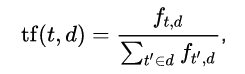

where $f_{t,d}$ is the raw count of a term in a document, i.e., the number of times that term t occurs in document d.  

Inverse document frequency is a measure of how much information the word provides if it is common across all of the documents.
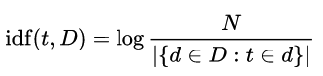
N: Total number of documents in the corpu
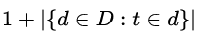
is the number of documents where the term t appears.

**Source of pictures**: Wikipedia  

## Iteratively apply k-means algorithm using different cluster sizes

Just iteratively apply K-means algorithm on the feature vector and collect the WCSS and the Silhoutte score for each iteration.

Since the feature vector is pretty large, I am choosing to use **MiniBatchKMeans** to speed up the execution time.

## Select the cluster size using Elbow-method or Silhoutte score

**Elbow method**
Plot the WCSS values for each cluster size and pick the cluster size at which point the curve seems to have plateued after a steep fall (elbow point).    
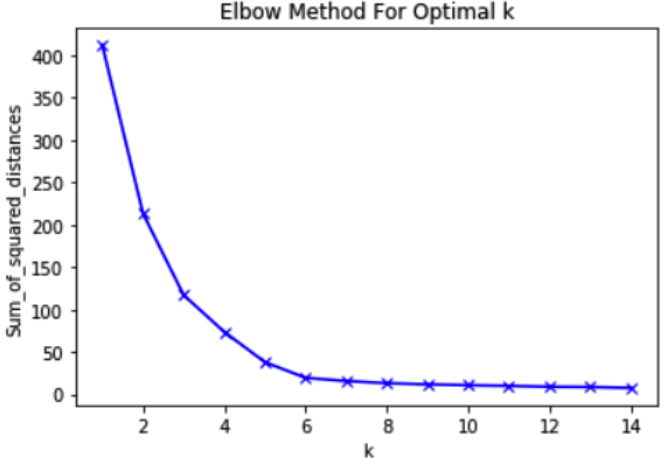.   
**NOTE**: This figure is not a representation of actual data of this project. This is just for pictorial represenation of how Elbow method works.
**Source**: Internet.

If the Elbow method does not give a conclusive guidane on the cluster size to pick, then utilize the Silhoutte score for each data point to determine the optimal cluster size.    

**Silhoutte value s(i) for each data point is defined as **.   
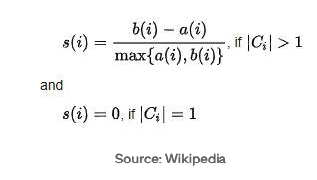

**a(i)** is the measure of similarity of the point i to its own cluster. It is measured as the average distance of i from other points in the cluster.    
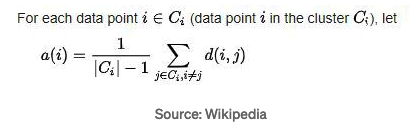

**b(i)** is the measure of dissimilarity of i from points in other clusters.    
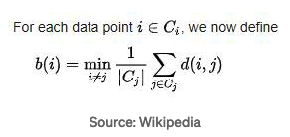

Once the Silhoutte scores are computed for each cluster size, select the cluster size with the highest Silhoutte score.

## Visualize the cluster classification

The data in higher dimensions cannot be viewed in a 2D or a 3D graph.   
The idea is to reduce the dimension of the feature vector into 2-dimensions using **Principal Component Analysis** and then use a scatter-plot to show the distribution of the data in reduced dimensions across the clusters.

# Functions created for this project.

In [73]:
def plot_wcss(clust_range, wcss):
    fig,a =  plt.subplots(1,1)
    plt.plot(clust_range,wcss)
    plt.title('WCSS vs. Number of clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

def plot_silhoutte(clust_range, silh):
    fig,b =  plt.subplots(1,1)
    plt.plot(clust_range,silh)
    plt.title('Silhoutte score vs. Number of clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhoutte scores')
    plt.show()

def cluster_search_kmeans(data, clust_range,
                          batch=True, batch_size=2048):
    wcss=[]
    silh=[]
    
    for nclust in clust_range:
        if batch == False:
            model = KMeans(nclust)
        else:
            model = MiniBatchKMeans(init="k-means++",
                                    n_clusters=nclust,
                                    batch_size=batch_size,
                                    random_state=3)
        
        y = model.fit_predict(data)
        
        wcss.append(model.inertia_)
        silh.append(silhouette_score(data,y))
    
    return wcss, silh

#Print top keywords from each cluster.
def generate_analyze_kmeans_model(X, K, cluster_size, vectorizer):  
    k_means_model = KMeans(n_clusters=cluster_size,
                           init='random',
                           n_init=1,
                           verbose=0,
                           random_state=42)
    
    k_means_model.fit(X)
    cluster_centers = k_means_model.cluster_centers_

    order_centroids = cluster_centers.argsort()[:, ::-1]
    features = vectorizer.get_feature_names()
    
    for i in range(cluster_size):
        print("Cluster-%d:" % i)
        word_list = []
        for ind in order_centroids[i, :K]:
            word_list.append(features[ind])
        print(str(word_list))
        print("")
        
    return k_means_model

# WORK FLOW EXECUTION

## Stage-1: Download the data.

NOTE: This stage also involves some data preprocessing. The **fetch_20newsgroups** is invoked to exclude the header, footer, quotes from each document.

In [3]:
from sklearn.datasets import fetch_20newsgroups

train_data = fetch_20newsgroups(subset='all',
                                remove=('headers', 'footers', 'quotes'),
                                shuffle=False)
'''
test_data  = fetch_20newsgroups(subset='test',
                                  remove=('headers', 'footers', 'quotes'),
                                  shuffle=False)
'''

"\ntest_data  = fetch_20newsgroups(subset='test',\n                                  remove=('headers', 'footers', 'quotes'),\n                                  shuffle=False)\n"

In [4]:
train_df = pd.DataFrame({'data': train_data.data,
                         'target': train_data.target})

### Analysis of the data.

In [5]:
print("Total file count: %d" %len(train_data.filenames))
print("File-Target association: " + str(train_data.target))
print("Unique targets: %d" %(len(np.unique(train_data.target))))
print("Predetermined targets: %d" %(len(train_data.target_names)))

Total file count: 18846
File-Target association: [ 9  4 11 ...  4  6  7]
Unique targets: 20
Predetermined targets: 20


#### Manually determined categories of the data.

In [6]:
train_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Distribution of files among pre-determined groups.

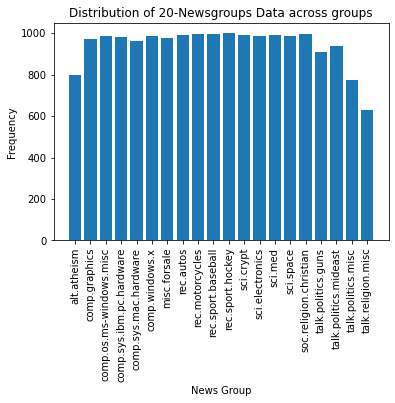

In [7]:
targets, tgt_freq = np.unique(train_data.target, return_counts=True)
target_names = np.array(train_data.target_names)

plt.bar(target_names, tgt_freq)
plt.xticks(rotation=90)
plt.title('Distribution of 20-Newsgroups Data across groups')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

**NOTE**: The distribution of documents across different target groups appear to be satisfactorly uniform.

### Sample data from a file

In [8]:
train_df.iloc[0][0]

"\nmorgan and guzman will have era's 1 run higher than last year, and\n the cubs will be idiots and not pitch harkey as much as hibbard.\n castillo won't be good (i think he's a stud pitcher)"

## Stage-2: Data Preprocessing

### Preprocess: Remove punctuation

In [9]:
train_df['data'] = train_df["data"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...\"@#_]", " ", s).split()))
train_df.data[0]

'morgan and guzman will have era s 1 run higher than last year and the cubs will be idiots and not pitch harkey as much as hibbard castillo won t be good (i think he s a stud pitcher)'

### Preprocess: Lower case all words

In [10]:
def lower_case(x):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

train_df['data'] = train_df.data.map(lower_case)
train_df.data[0]

'morgan and guzman will have era s 1 run higher than last year and the cubs will be idiots and not pitch harkey as much as hibbard castillo won t be good  i think he s a stud pitcher '

### Preprocess: Remove stop words

In [11]:
stop_words = set(stopwords.words('english'))
def remove_stop_words(text_data):
    return ' '.join([word for word in text_data.split() if word not in stop_words])

train_df["data"] = train_df["data"].apply(lambda s: remove_stop_words(s))
train_df.data[0]

'morgan guzman era 1 run higher last year cubs idiots pitch harkey much hibbard castillo good think stud pitcher'

### Preprocess: Remove all numbers

In [12]:
train_df["data"] = train_df["data"].str.replace(' \d+ ', '')
train_df.data[0]

/var/folders/8v/ccq4v7k51bx72pzxbbklpp1r0000gn/T/ipykernel_74866/2020704762.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df["data"] = train_df["data"].str.replace(' \d+ ', '')


'morgan guzman erarun higher last year cubs idiots pitch harkey much hibbard castillo good think stud pitcher'

### Preprocess: Remove all strings of size **1**.

**NOTE**: These single letter words may from after removal of puncutation, numbers, etc.

In [13]:
train_df["data"] = train_df["data"].str.replace(' [a-z] ', ' ')
train_df.data[0]

/var/folders/8v/ccq4v7k51bx72pzxbbklpp1r0000gn/T/ipykernel_74866/573601311.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df["data"] = train_df["data"].str.replace(' [a-z] ', ' ')


'morgan guzman erarun higher last year cubs idiots pitch harkey much hibbard castillo good think stud pitcher'

### Preprocess: Lemmatize the words

In [14]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)])

train_df["data"] = train_df["data"].apply(lemmatize)
train_df.data[0]

'morgan guzman erarun higher last year cub idiot pitch harkey much hibbard castillo good think stud pitcher'

## Stage-3:  Extract features using TF-IDF sparse vectorizer.

In [15]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train_df.data)
X.shape

(18846, 172641)

## Stage-4: Iterate k-means with different cluster sizes.

In [17]:
clust_range = range(3, 16) #[min, max)

wcss, silh = cluster_search_kmeans(X,
                                   clust_range,
                                   True, #Batch k-means
                                   2048) #Batch size (256x8 <- 8 cores)

## Stage-5: Analyze the WCSS and Silhoutte scores to determine best suitable cluster size.

### Using Elbow method to select cluster size.

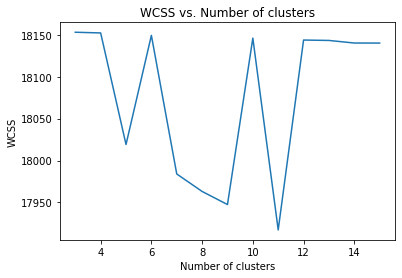

In [18]:
plot_wcss(clust_range, wcss)

**NOTE**: The **Elbow** method did not give a clear and concise guidance on the optimal cluster-size. I wonder what patterns in the data can lead to such a behavior!   

If I pick the lowest point in the above plot, it will be cluster of size **11**. Even though I am sure that **11** is not the correct cluster size, I would like to analyze how the keywords cluster in each of the clusters.

In [78]:
kmeans_model_1 = generate_analyze_kmeans_model(X, 50, 11, vectorizer)

Cluster-0:
['team', 'player', 'year', 'season', 'league', 'play', 'game', 'win', 'hockey', 'good', 'think', 'fan', 'baseball', 'nhl', 'hit', 'better', 'like', 'playoff', 'time', 'best', 'playing', 'guy', 'brave', 'pitcher', 'toronto', 'know', 'ranger', 'lot', 'run', 'coach', 'let', 'really', 'cup', 'hitter', 'pitching', 'stats', 'say', 'division', 'way', 'average', 'leaf', 'morris', 'red', 'make', 'great', 'point', 'detroit', 'look', 'ball', 'right']

Cluster-1:
['like', 'think', 'time', 'know', 'use', 'good', 'new', 'say', 'thing', 'problem', 'make', 'work', 'used', 'edu', 'way', 'year', 'sure', 'want', 'need', 'com', 'space', 'really', 'post', 'look', 'right', 'people', 'got', 'come', 'day', 'question', 'read', 'probably', 'going', 'mean', 'book', 'actually', 'try', 'better', 'lot', 'idea', 'point', 'said', 'article', 'heard', 'case', 'line', 'stuff', 'long', 'little', 'yes']

Cluster-2:
['people', 'government', 'right', 'gun', 'law', 'think', 'armenian', 'israel', 'say', 'state', 'l

/Users/bhkosara/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Using Silhoutte score method to select cluster size.

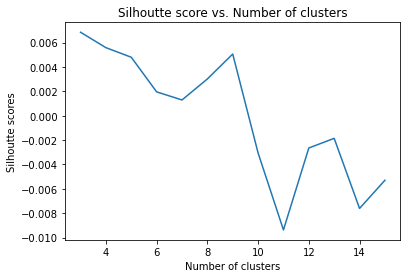

Cluster size with highest silhoutte score: 3


In [19]:
plot_silhoutte(clust_range, silh)

max_sil = max(silh)
max_idx = silh.index(max_sil)
recomend_clust_size = clust_range[0] + max_idx

print("Cluster size with highest silhoutte score: %d" %(recomend_clust_size))

In [79]:
kmeans_model_2 = generate_analyze_kmeans_model(X,
                                             40, #Top n-words
                                             recomend_clust_size,
                                             vectorizer)

Cluster-0:
['like', 'know', 'game', 'think', 'time', 'good', 'year', 'car', 'new', 'edu', 'make', 'team', 'thing', 'use', 'want', 'say', 'used', 'way', 'work', 'really', 'problem', 'need', 'bike', 'right', 'sure', 'look', 'got', 'lot', 'post', 'better', 'com', 'player', 'going', 'people', 'day', 'come', 'number', 'mail', 'thanks', 'space']

Cluster-1:
['window', 'file', 'thanks', 'drive', 'card', 'program', 'know', 'problem', 'use', 'driver', 'software', 'pc', 'disk', 'help', 'like', 'work', 'mac', 'graphic', 'need', 'mail', 'hi', 'advance', 'using', 'monitor', 'run', 'machine', 'ftp', 'video', 'format', 'image', 'scsi', 'computer', 'application', 'looking', 'color', 'server', 'memory', 'screen', 'font', 'port']

Cluster-2:
['people', 'god', 'think', 'say', 'government', 'right', 'christian', 'law', 'know', 'believe', 'like', 'key', 'thing', 'make', 'jesus', 'time', 'way', 'gun', 'life', 'said', 'point', 'mean', 'want', 'question', 'religion', 'state', 'armenian', 'child', 'fact', 'goo

/Users/bhkosara/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Stage-6: Visualization of the clusters.

It is difficult to visualize a plot in more than 3-dimesions. So the idea is to use PCA (Principal Components Analysis) to reduce the dimensions of the feature vector from **172641** to **2**.
Even though the dimesnions are reduced, the reduced data is expected to preserve most of the information.

### Use PCA to reduce feature vector dimensions.

In [66]:
# Init PCA with just 2 components
pcaModel = PCA(n_components=2, random_state=372)

# Fit and transform the data.
pca_data = pcaModel.fit_transform(X.toarray())

### Visualize using pca components and the classification from k-means (K=11).

In [92]:
def plot_pca(labels, pca_data, remap):
    visual_df = pd.DataFrame(columns=['cluster_id', 'pca_0', 'pca_1'])
    visual_df['cluster_id'] = labels
    visual_df['cluster_id'] = visual_df['cluster_id'].apply(remap)
    visual_df['pca_0'] = pca_data[:, 0]
    visual_df['pca_1'] = pca_data[:, 1]

    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    sns.scatterplot(data=visual_df,
                    x='pca_0',
                    y='pca_1',
                    hue='cluster_id',
                    palette="viridis").set(title='20news-group clustering')

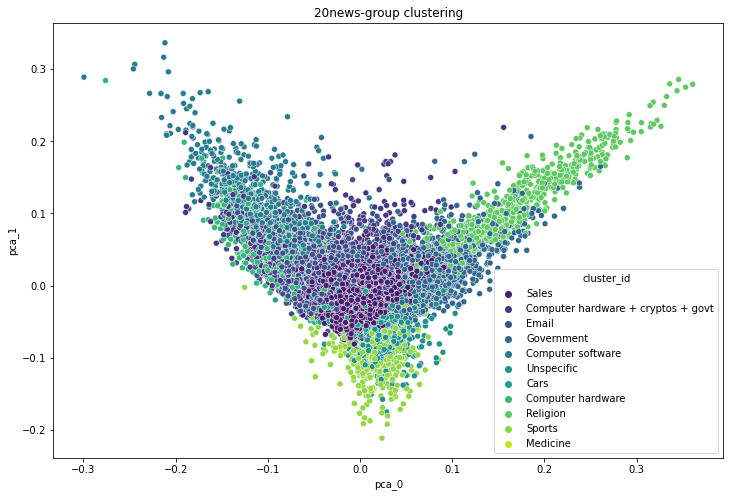

In [93]:
def remap_1(class_type):
    if class_type == 0:
        return "Unspecific"
    elif class_type == 1:
        return "Sales"
    elif class_type == 2:
        return "Government"
    elif class_type == 3:
        return "Computer hardware + cryptos + govt"
    elif class_type == 4:
        return "Computer software"
    elif class_type == 5:
        return "Medicine"
    elif class_type == 6:
        return "Computer hardware"
    elif class_type == 7:
        return "Sports"
    elif class_type == 8:
        return "Cars"
    elif class_type == 9:
        return "Religion"
    elif class_type == 10:
        return "Email"
    
plot_pca(kmeans_model_1.labels_, pca_data, remap_1)

### Visualize using pca components and the classification from kmeans (K=3).

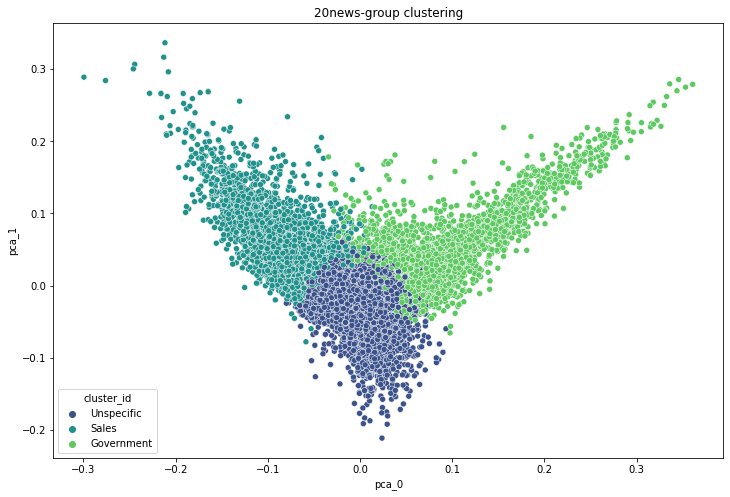

In [94]:
def remap(class_type):
    if class_type == 0:
        return "sports"
    elif class_type == 1:
        return "technology (HW and SW)"
    else:
        return "politics and religion"

plot_pca(kmeans_model_2.labels_, pca_data, remap_1)

# OBSERVATIONS.

## Observations general

Referring to the "About Data" section again,

The visual inspection of the document categories appears to be as follows in no particular order:  
  - "politics"  
  - "religion"  
  - "sports and cars"  
  - "computer hardware"  
  - "Misc: electronics, medicine, crpto,etc"  
  - "for sale"  
  
In general, notice that documents under "computer hardware" and "Misc" categories will have a heavy overlap.

Also "Misc" and "For sale" can also have an overlap.

**NOTE:** Trying to curve fit to achieve the same **6 categories** as above is not a correct approach.

## Observations on the cluster-size "3"

Based on the keywords in each category for **cluster size of 3**, I could infer that the implementation has categorized the documents as follows:  
  - "politics and religion"  
  - "sports and cars"  
  - "Everything else: computer hardware, electronics, medicine, cryptos, etc."   

In a theoritical sense the classification is **resonably correct**. But there are overlaps between the clusters as shown in the scatter-plot above, especially between the "technology" and "sports and cars" categories. This overlap can be explained because there are definitely commond words used among the texts of different categories, which when transformed into TF-IDF vectorization may lead to similarities in some of the feature dimensions.   

## Observations on cluster-size "11".

Based on the keywords in each category for **cluster size of 11**, I could infer that the implementation has categorized the documents as follows:  
  - Cluster-0: Unspecific
  - Cluster-1: Sales
  - Cluster-2: Government
  - Cluster-3: Computer hardware + cryptos + govt
  - Cluster-4: Computer software
  - Cluster-5: Medicine
  - Cluster-6: Computer hardware
  - Cluster-7: Sports
  - Cluster-8: Cars
  - Cluster-9: Religion
  - Cluster-10: Email
  
I was pleasantly surprised that even the classification using a cluster size of **11** is is also **resonably correct** even though I thought that the **Elbow method** did not give a conclusive answer. The only pitfall here is that I could not correctly give an English name to "cluster-0".

# Some pitfalls observed.

**Removal of punctuation**
Removal of punctuation might have some unintended effects. E.g., The word "won't" gets transformed into "won t" after removal of punctuation. And after further cleanup of uniliteral (strings with length of 1) strings, the final transformation of "won't" is "won" which is completely misleading and made cause classifier to misclassify a random document into sports category because of the final transformed word "won".

**unigram vs n-gram**
Words like ["Ram", "car"] are considered as unigrams. An n-gram represents **n** number of words as one single entity, e.g., "bus has", etc. 

Instead of using unigrams, a bigram, trigram, or some n-gram might be able to provide much better classification.

# CONCLUSION:

It is been demonstrated in this project that using a combination of TF-IDF feature vector generation, and k-means clustering, a given bunch of text documents in English can be classified into meaningful groups via unsupervised learning without having any labled data as a reference.